In [43]:
#Задача 1
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import numpy as np
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import datetime as dt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

path = (r'C:\Users\Aleksey\Python_study\ДЗ Python\season2\athletes_sochi.txt')
dfs = pd.read_csv(path).dropna()
alldata = dfs[['birthdate', 'weight', 'height', 'gender']]

def get_data(features, predicted):
    now = pd.Timestamp('now')
    new_gender = {"gender": {"Male" : 1, "Female" : 0}}
    newdata = dfs.replace(new_gender)
    now = pd.Timestamp('now')
    newdata['birthdate'] = pd.to_datetime(dfs['birthdate'], format='%Y-%m-%d')
    newdata['birthdate'] = newdata['birthdate'].where(newdata['birthdate'] < now, newdata['birthdate'] -  np.timedelta64(100, 'Y'))
    newdata['age'] = (now - newdata['birthdate']).astype('<m8[Y]')
    newdata["BMI"] = newdata["weight"] / (newdata["height"]**2)
    newdata = newdata.sample(frac=1)
    global allinput, alloutput
    allinput = newdata[features]
    alloutput = newdata[predicted]
    print(allinput, alloutput)

def train_and_test_model_linear():
    global X_train, X_test, Y_train, Y_test
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(allinput, alloutput, test_size=0.05)
#     scaler = MinMaxScaler(feature_range = (0,1))
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
    global model
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    global Y_test_predicted
    Y_test_predicted = model.predict(X_test)

def get_sex(myW, myH, myA):
    myBMI=myW/(myH**2)
    mysex=model.predict_proba([[myW, myH, myA, myBMI]])
    print('\n', mysex)

def precision_and_recall():
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, Y_test_predicted)
    confusion_matrix(Y_test, Y_test_predicted)
    precision = tp / (tp + fp)
    recall = tp / tp + fn

    print('\n', "Precision: ", tp / (tp + fp))
    print("Recall: ", tp / (tp + fn))
    print("Accuracy: ", (tn + tp) / (tp + fp + tn + fn))
    print("F1: ",  (precision * recall) / ((precision) + recall))
    report = classification_report(Y_test, model.predict(X_test), target_names=['Male', 'Female'])
    print(report)

get_data(features = ['weight', 'height', 'age', 'BMI'], predicted = 'gender')
train_and_test_model_linear()
# get_sex(myW = 70, myH = 1.82, myA = 23)
precision_and_recall()
#Accuracy увеличивается за счет добавления BMI и возраста в модель, однако тогда в модели появляется мультиколлинеарность.
#Также accuracy увеличивается в зависимости от test_size датасета

      weight  height   age        BMI
1785   114.0    1.96  36.0  29.675135
1359    70.0    1.76  29.0  22.598140
1896    54.0    1.58  29.0  21.631149
2631    61.0    1.65  38.0  22.405877
2836    77.0    1.84  37.0  22.743384
...      ...     ...   ...        ...
2449    70.0    1.74  32.0  23.120624
2801    72.0    1.66  35.0  26.128611
780     72.0    1.68  32.0  25.510204
1445    67.0    1.74  34.0  22.129740
1746    77.0    1.75  32.0  25.142857

[2479 rows x 4 columns] 1785    1
1359    0
1896    0
2631    0
2836    1
       ..
2449    1
2801    1
780     0
1445    1
1746    1
Name: gender, Length: 2479, dtype: int64

 Precision:  0.8648648648648649
Recall:  0.8421052631578947
Accuracy:  0.8225806451612904
F1:  0.810916179337232
              precision    recall  f1-score   support

        Male       0.76      0.79      0.78        48
      Female       0.86      0.84      0.85        76

    accuracy                           0.82       124
   macro avg       0.81      0.82   

In [40]:
#Задача 2
#Тут я только начал вникать в этот датасет и метод кластризации, так что даже не знаю, какие функции можно реализовать
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.cluster import AffinityPropagation
import seaborn as sns
import matplotlib.pyplot as plt
path = (r'C:\Users\Aleksey\Python_study\ДЗ Python\season2\flavors_of_cacao.csv') #Так себе датасет для кластеризации
cocao_df = pd.read_csv(path, na_values='\xa0').dropna()
cocao_df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
11,A. Morin,Madagascar,1011,2013,70%,France,3.00,Criollo,Madagascar
17,A. Morin,Chuao,1015,2013,70%,France,4.00,Trinitario,Venezuela
...,...,...,...,...,...,...,...,...,...
1784,Zotter,El Oro,879,2012,75%,Austria,3.00,Forastero (Nacional),Ecuador
1785,Zotter,Huiwani Coop,879,2012,75%,Austria,3.00,"Criollo, Trinitario",Papua New Guinea
1788,Zotter,"Kongo, Highlands",883,2012,68%,Austria,3.25,Forastero,Congo
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo


In [47]:
cocao_df['Company\nLocation'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil',
       'U.K.', 'Australia', 'Germany', 'Belgium', 'Venezuela', 'Japan',
       'New Zealand', 'Costa Rica', 'Colombia', 'South Korea',
       'Amsterdam', 'Scotland', 'Sao Tome', 'Argentina', 'Guatemala',
       'South Africa', 'Portugal', 'Singapore', 'Denmark', 'Vietnam',
       'Grenada', 'Israel', 'Czech Republic', 'Finland', 'Madagascar',
       'Philippines', 'Poland', 'Sweden', 'Lithuania', 'Nicaragua',
       'Chile', 'Ghana', 'Iceland', 'Eucador', 'Hungary', 'Suriname',
       'Ireland', 'Austria'], dtype=object)

In [3]:
cocao_df['Company\nLocation'] = cocao_df['Company\nLocation'].astype('category')
cocao_df["Company_Location_label"] = cocao_df["Company\nLocation"].cat.codes
cocao_df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Cocoa %,Company_Location_label
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela,70.0,16
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela,70.0,16
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela,70.0,16
11,A. Morin,Madagascar,1011,2013,70%,France,3.00,Criollo,Madagascar,70.0,16
17,A. Morin,Chuao,1015,2013,70%,France,4.00,Trinitario,Venezuela,70.0,16


In [4]:
dict_of_countries = dict(enumerate(cocao_df["Company\nLocation"].cat.categories)) #Словарь категорий и стран
print(dict_of_countries)

{0: 'Amsterdam', 1: 'Argentina', 2: 'Australia', 3: 'Austria', 4: 'Belgium', 5: 'Brazil', 6: 'Canada', 7: 'Chile', 8: 'Colombia', 9: 'Costa Rica', 10: 'Czech Republic', 11: 'Denmark', 12: 'Ecuador', 13: 'Eucador', 14: 'Fiji', 15: 'Finland', 16: 'France', 17: 'Germany', 18: 'Ghana', 19: 'Grenada', 20: 'Guatemala', 21: 'Hungary', 22: 'Iceland', 23: 'Ireland', 24: 'Israel', 25: 'Italy', 26: 'Japan', 27: 'Lithuania', 28: 'Madagascar', 29: 'Mexico', 30: 'Netherlands', 31: 'New Zealand', 32: 'Nicaragua', 33: 'Peru', 34: 'Philippines', 35: 'Poland', 36: 'Portugal', 37: 'Sao Tome', 38: 'Scotland', 39: 'Singapore', 40: 'South Africa', 41: 'South Korea', 42: 'Spain', 43: 'Suriname', 44: 'Sweden', 45: 'Switzerland', 46: 'U.K.', 47: 'U.S.A.', 48: 'Venezuela', 49: 'Vietnam'}


In [5]:
# cocao_df['Broad Bean\nOrigin'] = cocao_df['Broad Bean\nOrigin'].astype('category')
# cocao_df["Bean_Origin_label"] = cocao_df["Broad Bean\nOrigin"].cat.codes
# cocao_df.head()

In [6]:
# dict_of_countries_beans = dict(enumerate(cocao_df["Broad Bean\nOrigin"].cat.categories)) #Словарь категорий и стран
# print(dict_of_countries_beans)

In [7]:
# cocao_df.iloc[:, 0]

In [38]:
# #Смотрим средний рейтинг по производителю
# maker_mean_rating = cocao_df.groupby(cocao_df.iloc[:, 0])['Rating'].mean()
# maker_mean_rating = maker_mean_rating.sort_values()
# makers = pd.DataFrame(maker_mean_rating)
# makers['Maker'] = maker_mean_rating.index
# fig, ax = plt.subplots(figsize=(50, 20))
# sns.barplot(x="Maker", y="Rating", data = makers, ax = ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# plt.show()

In [9]:
cocao_df.iloc[:, 0] = cocao_df.iloc[:, 0].astype('category')
cocao_df["Maker_label"] = cocao_df.iloc[:, 0].cat.codes
cocao_df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Cocoa %,Company_Location_label,Maker_label
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela,70.0,16,0
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela,70.0,16,0
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela,70.0,16,0
11,A. Morin,Madagascar,1011,2013,70%,France,3.00,Criollo,Madagascar,70.0,16,0
17,A. Morin,Chuao,1015,2013,70%,France,4.00,Trinitario,Venezuela,70.0,16,0


In [10]:
dict_of_makers = dict(enumerate(cocao_df.iloc[:, 0].cat.categories)) #Словарь категорий и стран
print(dict_of_makers)

{0: 'A. Morin', 1: 'AMMA', 2: 'Acalli', 3: 'Adi', 4: 'Aequare (Gianduja)', 5: 'Ah Cacao', 6: "Akesson's (Pralus)", 7: 'Alain Ducasse', 8: 'Alexandre', 9: 'Altus aka Cao Artisan', 10: 'Amano', 11: 'Amatller (Simon Coll)', 12: 'Amazona', 13: 'Ambrosia', 14: 'Amedei', 15: 'Ara', 16: 'Arete', 17: 'Artisan du Chocolat', 18: 'Artisan du Chocolat (Casa Luker)', 19: 'Askinosie', 20: 'Bahen & Co.', 21: 'Bar Au Chocolat', 22: 'Bellflower', 23: 'Belyzium', 24: 'Benoit Nihant', 25: 'Beschle (Felchlin)', 26: 'Bisou', 27: 'Bittersweet Origins', 28: 'Black Mountain', 29: 'Black River (A. Morin)', 30: 'Blanxart', 31: 'Blue Bandana', 32: 'Bonnat', 33: 'Bouga Cacao (Tulicorp)', 34: 'Bowler Man', 35: "Brasstown aka It's Chocolate", 36: 'Brazen', 37: 'Breeze Mill', 38: 'Bright', 39: 'Burnt Fork Bend', 40: 'C-Amaro', 41: 'Cacao Atlanta', 42: 'Cacao Barry', 43: 'Cacao Market', 44: 'Cacao Prieto', 45: 'Cacao Sampaka', 46: 'Cacao Store', 47: 'Cacao de Origen', 48: 'Cacaoyere (Ecuatoriana)', 49: 'Callebaut', 5

C:\Users\Aleksey\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


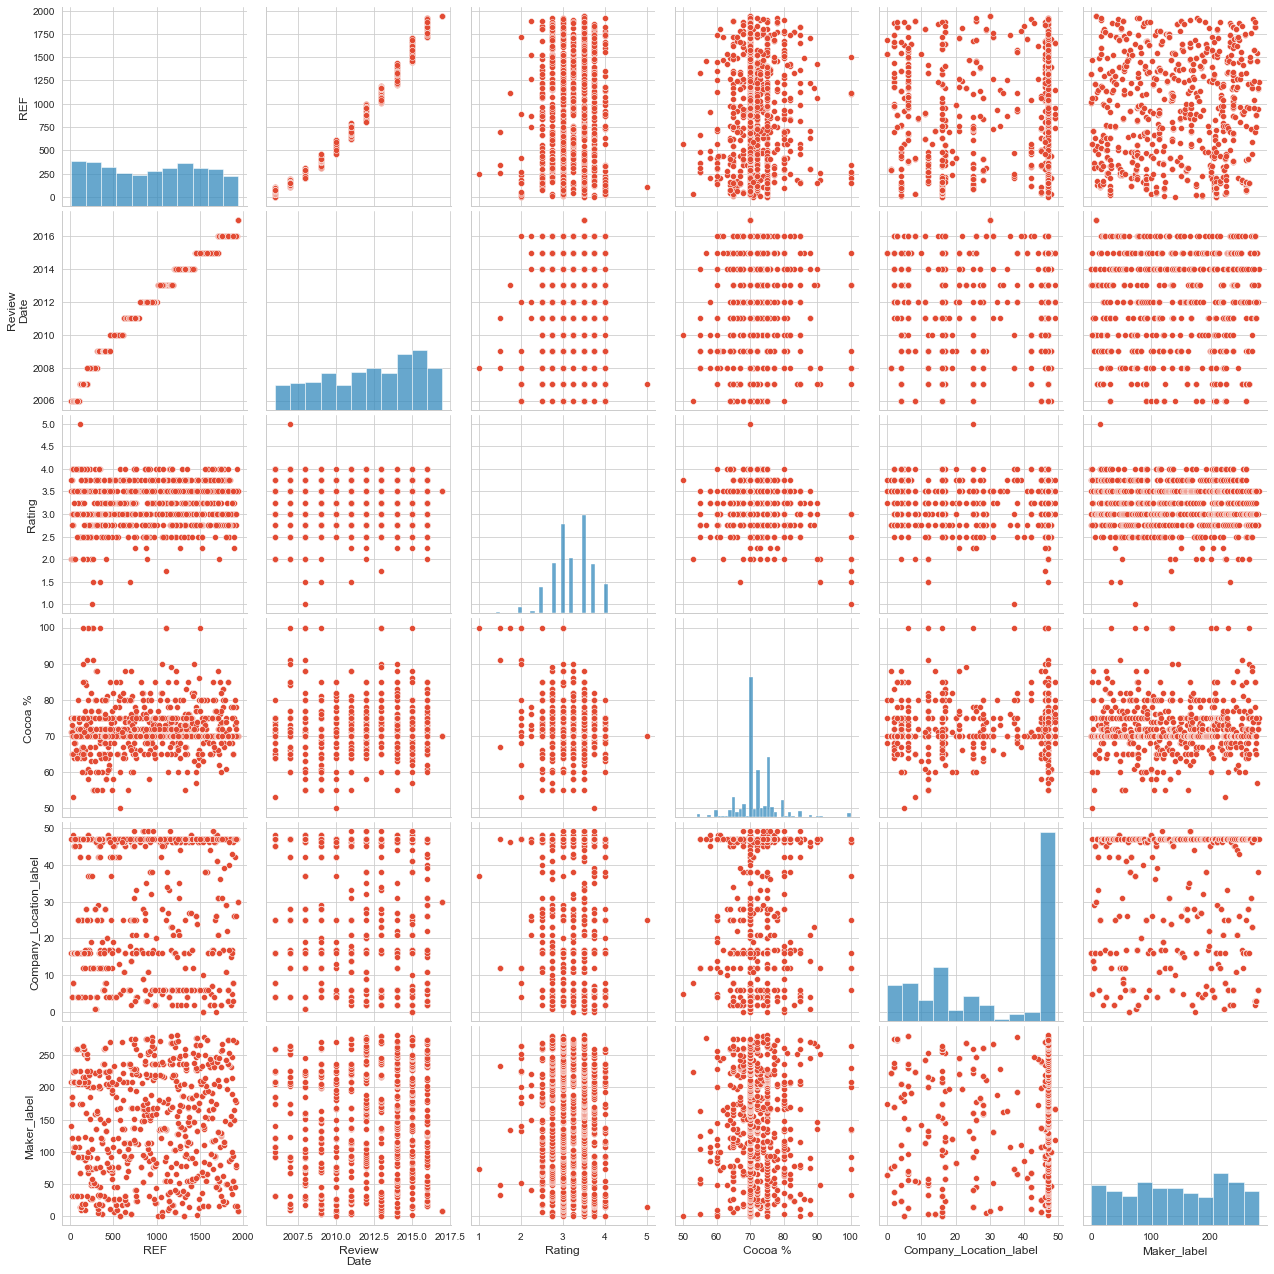

In [11]:
sns.set_style("whitegrid")
sns.pairplot(cocao_df, size=3);
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
data = cocao_df[['Cocoa %','Rating','Review\nDate', 'Company_Location_label', 'Maker_label']]
# df_num = StandardScaler().fit_transform(data)
# df_num

In [13]:
import numpy as np
affinity = AffinityPropagation(damping = 0.9, max_iter = 500, affinity ='euclidean').fit(data)
core_samples_mask = np.zeros_like(affinity.labels_, dtype=bool)
labels = affinity.labels_
centroids = affinity.cluster_centers_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

17

In [14]:
# affinity.labels_

In [15]:
cocao_df = cocao_df.join(pd.DataFrame(labels))
cocao_df = cocao_df.rename(columns={0:'Cluster'})

cocao_df['Cluster'].value_counts()

13.0    56
15.0    43
9.0     36
11.0    35
7.0     32
16.0    29
4.0     29
1.0     28
5.0     26
8.0     26
14.0    21
6.0     18
0.0     16
10.0    16
12.0    15
3.0     13
2.0     12
Name: Cluster, dtype: int64

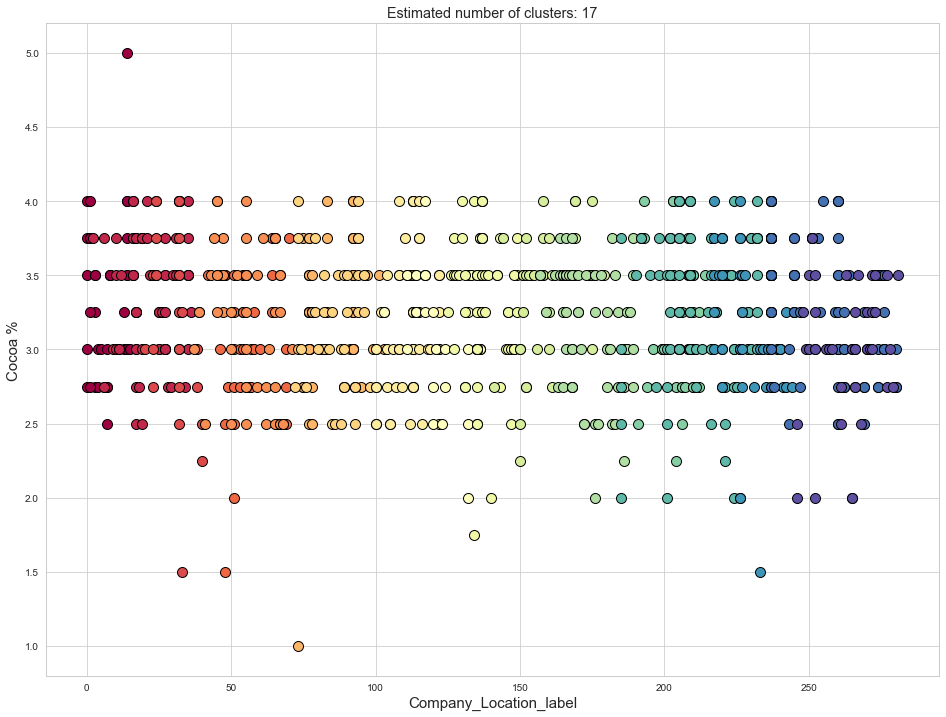

In [35]:
plt.figure(figsize=(16,12))
X = data
# data = cocao_df[['Cocoa %','Rating','Review\nDate', 'Company_Location_label', 'Maker_label']]

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 4], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
    ax = plt.gca()
    ax.set_xlabel('Company_Location_label', fontsize=15)
    ax.set_ylabel('Rating', fontsize=15)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

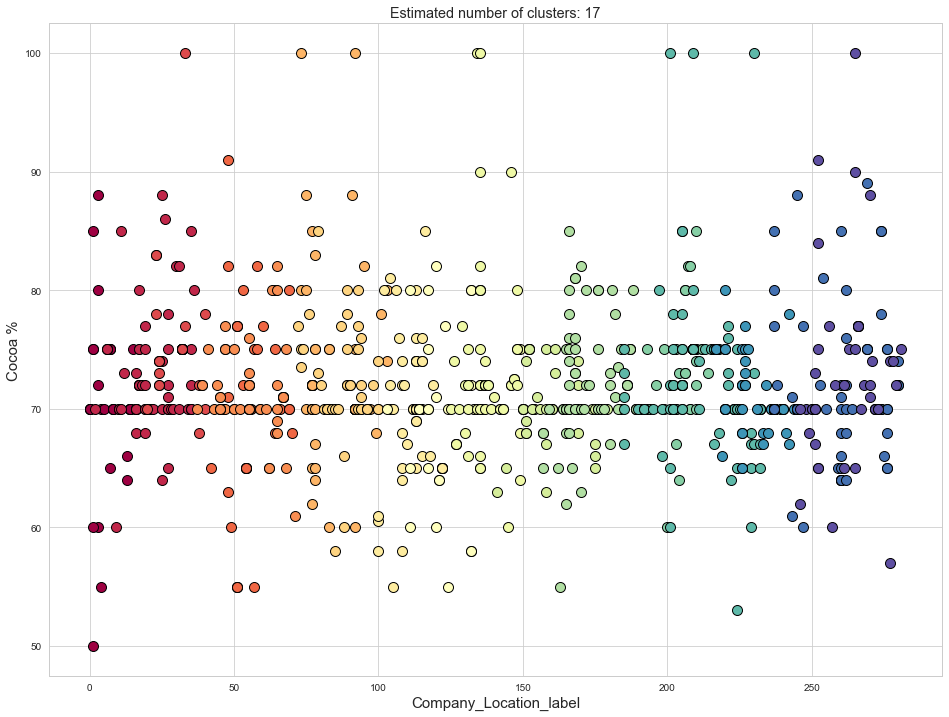

In [36]:
plt.figure(figsize=(16,12))
X = data
# data = cocao_df[['Cocoa %','Rating','Review\nDate', 'Company_Location_label', 'Maker_label']]

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 4], xy.iloc[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
    ax = plt.gca()
    ax.set_xlabel('Company_Location_label', fontsize=15)
    ax.set_ylabel('Cocoa %', fontsize=15)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

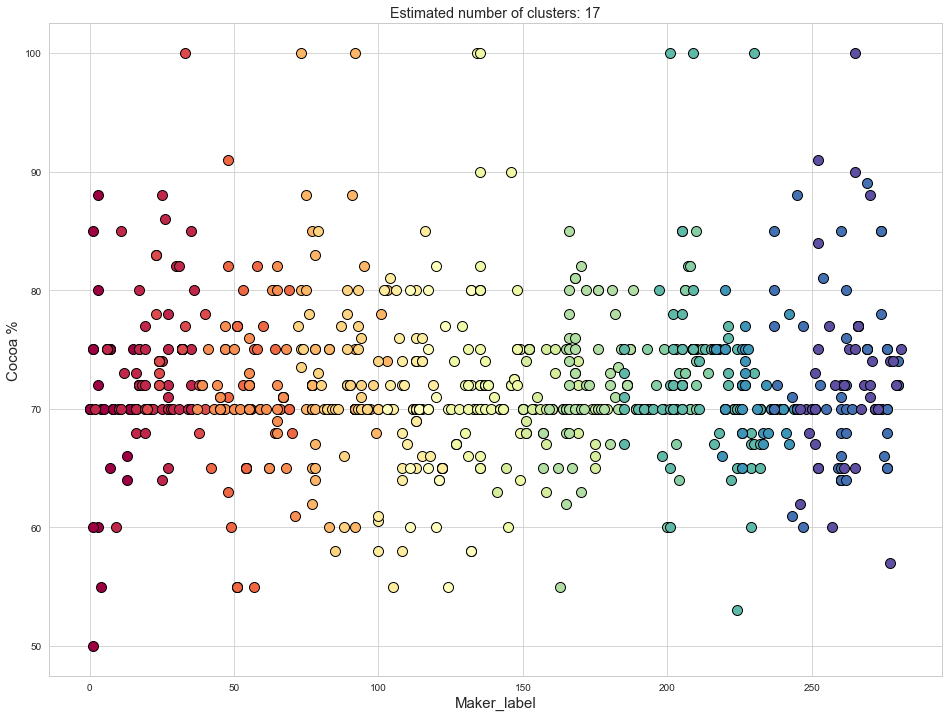

In [37]:
plt.figure(figsize=(16,12))
X = data
# data = cocao_df[['Cocoa %','Rating','Review\nDate', 'Company_Location_label', 'Maker_label']]

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 4], xy.iloc[:, 0], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
    ax = plt.gca()
    ax.set_xlabel('Maker_label', fontsize=15)
    ax.set_ylabel('Cocoa %', fontsize=15)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()